In [49]:
import numpy as np 
import torch
import matplotlib.pyplot as plt 

In [5]:

def s(sigma):
    sigma=torch.from_numpy(sigma)
    sigma = torch.sigmoid(sigma * 5) + 1e-5
    sigma = torch.pow(3, sigma) - 1
    return sigma.detach().numpy()

In [14]:
x=np.linspace(-10,10,1000)
y=s(x)

In [15]:
x

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73

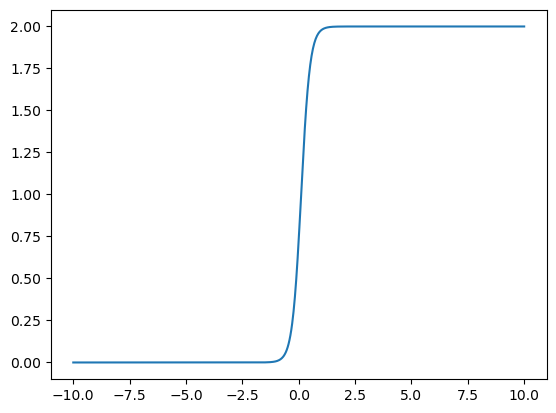

In [16]:
plt.plot(x,y)

## Cargar el modelo del repo Oficial:

In [2]:
#tenemos que agregar al sys path el directorio
import sys
sys.path.append("/home/arturo/Documents/MasterCD/TFM/codigo/otros_repos/Anomaly-Transformer_oficial")

In [50]:
from model.AnomalyTransformer import AnomalyTransformer
from torchsummary import summary


In [66]:
model=AnomalyTransformer(win_size=100, enc_in=25, c_out=25, e_layers=3, d_model=128, n_heads=4)

In [70]:
x=torch.randn(64,100,25)
enc_out, series, prior, sigmas=model(x)
print(enc_out.shape, len(series), len(prior), len(sigmas))

AttributeError: 'list' object has no attribute 'shape'

In [65]:

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total trainable parameters: {total_params}")


Total trainable parameters: 610213


In [53]:
a=list(model.parameters())

In [54]:
print(model)

AnomalyTransformer(
  (embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(25, 512, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0): EncoderLayer(
        (attention): AttentionLayer(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (inner_attention): AnomalyAttention(
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (query_projection): Linear(in_features=512, out_features=512, bias=True)
          (key_projection): Linear(in_features=512, out_features=512, bias=True)
          (value_projection): Linear(in_features=512, out_features=512, bias=True)
          (sigma_projection): Linear(in_features=512, out_features=8, bias=True)
          (out_projection): Linear(in_features=512, out_features=5

In [57]:
summary(model,(100,25))

AttributeError: 'list' object has no attribute 'size'